In [1]:
from clusters import algs

import numpy as np
import matplotlib.pyplot as plt

csv = 'ligand_information.csv'
ligands = algs.read_ligand_csv(csv)

#### Question 1:

I used the Tanimoto Coefficient to calculate the similarity between molecules.  The Tanimoto coefficient is equal to the intersection between the two molecules' on bits, divided by the union of the two molecules' on bits.

     Tanimoto Coeff. = J(A, B) = | A ∩ B | / | A ∪ B |

#### Question 2:
- Dimensionality reduction algorithm to visualize molecule dataset

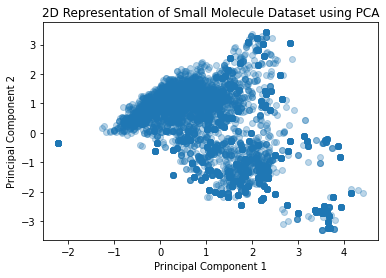

In [2]:
from sklearn.decomposition import PCA

x = [ligand.bitstring for ligand in ligands]
x = np.array(x)

pca = PCA(n_components=2)
pca.fit(x)
#print(pca.singular_values_)
x = pca.transform(x)

pc1 = x[:, 0]
pc2 = x[:, 1]

plt.scatter(pc1, pc2, alpha=0.3)
plt.title('2D Representation of Small Molecule Dataset using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

#### Question 3:

Partitional Clustering --> Visualizing Clusters on PCA plot

In [2]:
## Code I ran to populate and save the distance matrix:
# hc2 = algs.HierarchicalClustering()
# distanceMatrix2 = hc2.makeDistanceMatrix(ligands)
# np.save('distanceMatrix2.npy', distanceMatrix2)

distanceMatrix = np.load('distanceMatrix2.npy')

In [4]:
pc = algs.PartitionClustering()

In [18]:
# Determine the optimal number of clusters (from 3 - 10)

ave_sc = -2
k = 3
numTrials = 3 # number of trials per k

for numClusters in range(3,11):
    all_scs = []
    for trial in range(numTrials):
        pcclusters = pc.cluster(ligands, distanceMatrix, numClusters, verbose = False)
        curr_sc = algs.silhouetteCoeff(pcclusters, distanceMatrix)
        all_scs.append(curr_sc)
        print('Silhouette Coeff = %.4f for %d clusters, trial %d' % (curr_sc, numClusters, trial))
    new_sc = sum(all_scs) / len(all_scs)
    if new_sc > ave_sc:
        ave_sc = new_sc
        k = numClusters
print('Optimal number of clusters = %d' % k)


Silhouette Coeff = -0.8348 for 3 clusters, trial 0
Silhouette Coeff = -0.8356 for 3 clusters, trial 1
Silhouette Coeff = -0.8406 for 3 clusters, trial 2
Silhouette Coeff = -0.8358 for 4 clusters, trial 0
Silhouette Coeff = -0.8358 for 4 clusters, trial 1
Silhouette Coeff = -0.8396 for 4 clusters, trial 2
Silhouette Coeff = -0.8462 for 5 clusters, trial 0
Silhouette Coeff = -0.8485 for 5 clusters, trial 1
Silhouette Coeff = -0.7361 for 5 clusters, trial 2
Silhouette Coeff = -0.8529 for 6 clusters, trial 0
Silhouette Coeff = -0.3622 for 6 clusters, trial 1
Silhouette Coeff = -0.3702 for 6 clusters, trial 2
Silhouette Coeff = -0.7346 for 7 clusters, trial 0
Silhouette Coeff = -0.4250 for 7 clusters, trial 1
Silhouette Coeff = -0.4081 for 7 clusters, trial 2
Silhouette Coeff = -0.7214 for 8 clusters, trial 0
Silhouette Coeff = -0.9257 for 8 clusters, trial 1
Silhouette Coeff = -0.9547 for 8 clusters, trial 2
Silhouette Coeff = -0.3893 for 9 clusters, trial 0
Silhouette Coeff = -0.7872 for 

In [29]:
# Note: I ran the partition clustering algorithm twice, once with 6 clusters and once with 7, but I left both plots
# because I think the differences between the two plots are interesting.


# With K = 6:

pcclusters = pc.cluster(ligands, distanceMatrix, numClusters = 6, verbose = False)

In [30]:
for cluster in pcclusters:
    print(len(cluster.ligands))
sc = algs.silhouetteCoeff(pcclusters, distanceMatrix)
print('Silhouette Coeff = %.4f' % sc)

4140
4211
4
1
8
160
Silhouette Coeff = -0.6617


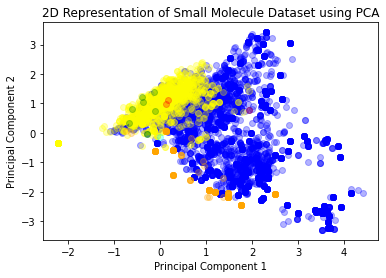

In [32]:
i = 0
colors = ['blue', 'yellow', 'red', 'cyan', 'green', 'orange', 'purple', 'black']

x = [ligand.bitstring for ligand in ligands]
x = np.array(x)

pca = PCA(n_components=2)
pca.fit(x)
#print(pca.singular_values_)
x = pca.transform(x)

for cluster in pcclusters:
    pc1 = []
    pc2 = []
    for ligand in cluster.ligands:
        pc1.append(x[ligand.ligandIndex, 0])
        pc2.append(x[ligand.ligandIndex, 1])
    plt.scatter(pc1, pc2, color=colors[i], alpha=0.3)
    i+=1
    
plt.title('2D Representation of Small Molecule Dataset using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [36]:
# With K = 7:

pcclusters = pc.cluster(ligands, distanceMatrix, numClusters = 7, verbose = False)

In [37]:
for cluster in pcclusters:
    print(len(cluster.ligands))
sc = algs.silhouetteCoeff(pcclusters, distanceMatrix)
print('Silhouette Coeff = %.4f' % sc)

4004
4373
1
3
4
138
1
Silhouette Coeff = -0.5892


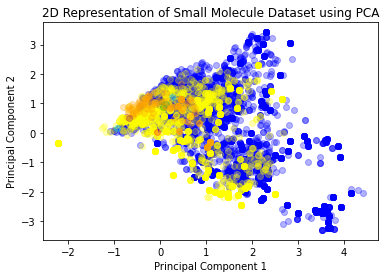

In [38]:
i = 0
colors = ['blue', 'yellow', 'red', 'cyan', 'green', 'orange', 'purple', 'black']

x = [ligand.bitstring for ligand in ligands]
x = np.array(x)

pca = PCA(n_components=2)
pca.fit(x)
#print(pca.singular_values_)
x = pca.transform(x)

for cluster in pcclusters:
    pc1 = []
    pc2 = []
    for ligand in cluster.ligands:
        pc1.append(x[ligand.ligandIndex, 0])
        pc2.append(x[ligand.ligandIndex, 1])
    plt.scatter(pc1, pc2, color=colors[i], alpha=0.3)
    i+=1
    
plt.title('2D Representation of Small Molecule Dataset using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

#### Question 4:

I chose to implement the K-Means++ partition clustering algorithm because it is fast and has logically chosen starting centroids.  It is sensitive to initialization conditions because the first centroid is chosen by randomly assigning one example from the dataset as the first centroid, then all other centroids are picked from the examples randomly based off a probability distribution which is proportional to the examples' distances from the existing centroids.

I selected the number of clusters by running the clustering algorithm 3 times for each number of clusters from 3 to 10, then chose the number of clusters that had the lowest average Silhouette Coefficient across its 3 trials.  This method suggested that 7 clusters was best for the given data, though the average Silhouette Coefficient for 6 clusters was only 1% greater than that of 7 clusters.  I plotted the results from using both 6 and 7 clusters, and the differences between the two plots is interesting.  The clusters seem to be grouped together more in the PCA plot when clustered into 6 groups than when grouped into 7.

#### Question 5:
Hierarchical Clustering --> Visualizing Clusters on PCA Plot

In [3]:
hc = algs.HierarchicalClustering()

In [4]:
hcclusters = hc.cluster(ligands[:20], distanceMatrix, numClusters=5, verbose=True)

Clustering step number 0
Clustering step number 1
Clustering step number 2
Clustering step number 3
Clustering step number 4
Clustering step number 5
Clustering step number 6
Clustering step number 7
Clustering step number 8
Clustering step number 9
Clustering step number 10
Clustering step number 11
Clustering step number 12
Clustering step number 13
Clustering step number 14


In [6]:
for cluster in hcclusters:
    print(len(cluster.ligands))

1
2
4
8
5


In [11]:
hcclusters = hc.cluster(ligands[:1000], distanceMatrix, numClusters=5, verbose=True)

Clustering step number 0
Clustering step number 1
Clustering step number 2
Clustering step number 3
Clustering step number 4
Clustering step number 5
Clustering step number 6
Clustering step number 7
Clustering step number 8
Clustering step number 9
Clustering step number 10
Clustering step number 11
Clustering step number 12
Clustering step number 13
Clustering step number 14
Clustering step number 15
Clustering step number 16
Clustering step number 17
Clustering step number 18
Clustering step number 19
Clustering step number 20
Clustering step number 21
Clustering step number 22
Clustering step number 23
Clustering step number 24
Clustering step number 25
Clustering step number 26
Clustering step number 27
Clustering step number 28
Clustering step number 29
Clustering step number 30
Clustering step number 31
Clustering step number 32
Clustering step number 33
Clustering step number 34
Clustering step number 35
Clustering step number 36
Clustering step number 37
Clustering step number

Clustering step number 309
Clustering step number 310
Clustering step number 311
Clustering step number 312
Clustering step number 313
Clustering step number 314
Clustering step number 315
Clustering step number 316
Clustering step number 317
Clustering step number 318
Clustering step number 319
Clustering step number 320
Clustering step number 321
Clustering step number 322
Clustering step number 323
Clustering step number 324
Clustering step number 325
Clustering step number 326
Clustering step number 327
Clustering step number 328
Clustering step number 329
Clustering step number 330
Clustering step number 331
Clustering step number 332
Clustering step number 333
Clustering step number 334
Clustering step number 335
Clustering step number 336
Clustering step number 337
Clustering step number 338
Clustering step number 339
Clustering step number 340
Clustering step number 341
Clustering step number 342
Clustering step number 343
Clustering step number 344
Clustering step number 345
C

Clustering step number 613
Clustering step number 614
Clustering step number 615
Clustering step number 616
Clustering step number 617
Clustering step number 618
Clustering step number 619
Clustering step number 620
Clustering step number 621
Clustering step number 622
Clustering step number 623
Clustering step number 624
Clustering step number 625
Clustering step number 626
Clustering step number 627
Clustering step number 628
Clustering step number 629
Clustering step number 630
Clustering step number 631
Clustering step number 632
Clustering step number 633
Clustering step number 634
Clustering step number 635
Clustering step number 636
Clustering step number 637
Clustering step number 638
Clustering step number 639
Clustering step number 640
Clustering step number 641
Clustering step number 642
Clustering step number 643
Clustering step number 644
Clustering step number 645
Clustering step number 646
Clustering step number 647
Clustering step number 648
Clustering step number 649
C

Clustering step number 949
Clustering step number 950
Clustering step number 951
Clustering step number 952
Clustering step number 953
Clustering step number 954
Clustering step number 955
Clustering step number 956
Clustering step number 957
Clustering step number 958
Clustering step number 959
Clustering step number 960
Clustering step number 961
Clustering step number 962
Clustering step number 963
Clustering step number 964
Clustering step number 965
Clustering step number 966
Clustering step number 967
Clustering step number 968
Clustering step number 969
Clustering step number 970
Clustering step number 971
Clustering step number 972
Clustering step number 973
Clustering step number 974
Clustering step number 975
Clustering step number 976
Clustering step number 977
Clustering step number 978
Clustering step number 979
Clustering step number 980
Clustering step number 981
Clustering step number 982
Clustering step number 983
Clustering step number 984
Clustering step number 985
C

In [12]:
for cluster in hcclusters:
    print(len(cluster.ligands))

59
45
250
345
301


In [13]:
hcclusters = hc.cluster(ligands[:2000], distanceMatrix, numClusters=5, verbose=True)

Clustering step number 0
Clustering step number 1
Clustering step number 2
Clustering step number 3
Clustering step number 4
Clustering step number 5
Clustering step number 6
Clustering step number 7
Clustering step number 8
Clustering step number 9
Clustering step number 10
Clustering step number 11
Clustering step number 12
Clustering step number 13
Clustering step number 14
Clustering step number 15
Clustering step number 16
Clustering step number 17
Clustering step number 18
Clustering step number 19
Clustering step number 20
Clustering step number 21
Clustering step number 22
Clustering step number 23
Clustering step number 24
Clustering step number 25
Clustering step number 26
Clustering step number 27
Clustering step number 28
Clustering step number 29
Clustering step number 30
Clustering step number 31
Clustering step number 32
Clustering step number 33
Clustering step number 34
Clustering step number 35
Clustering step number 36
Clustering step number 37
Clustering step number

Clustering step number 308
Clustering step number 309
Clustering step number 310
Clustering step number 311
Clustering step number 312
Clustering step number 313
Clustering step number 314
Clustering step number 315
Clustering step number 316
Clustering step number 317
Clustering step number 318
Clustering step number 319
Clustering step number 320
Clustering step number 321
Clustering step number 322
Clustering step number 323
Clustering step number 324
Clustering step number 325
Clustering step number 326
Clustering step number 327
Clustering step number 328
Clustering step number 329
Clustering step number 330
Clustering step number 331
Clustering step number 332
Clustering step number 333
Clustering step number 334
Clustering step number 335
Clustering step number 336
Clustering step number 337
Clustering step number 338
Clustering step number 339
Clustering step number 340
Clustering step number 341
Clustering step number 342
Clustering step number 343
Clustering step number 344
C

Clustering step number 612
Clustering step number 613
Clustering step number 614
Clustering step number 615
Clustering step number 616
Clustering step number 617
Clustering step number 618
Clustering step number 619
Clustering step number 620
Clustering step number 621
Clustering step number 622
Clustering step number 623
Clustering step number 624
Clustering step number 625
Clustering step number 626
Clustering step number 627
Clustering step number 628
Clustering step number 629
Clustering step number 630
Clustering step number 631
Clustering step number 632
Clustering step number 633
Clustering step number 634
Clustering step number 635
Clustering step number 636
Clustering step number 637
Clustering step number 638
Clustering step number 639
Clustering step number 640
Clustering step number 641
Clustering step number 642
Clustering step number 643
Clustering step number 644
Clustering step number 645
Clustering step number 646
Clustering step number 647
Clustering step number 648
C

Clustering step number 916
Clustering step number 917
Clustering step number 918
Clustering step number 919
Clustering step number 920
Clustering step number 921
Clustering step number 922
Clustering step number 923
Clustering step number 924
Clustering step number 925
Clustering step number 926
Clustering step number 927
Clustering step number 928
Clustering step number 929
Clustering step number 930
Clustering step number 931
Clustering step number 932
Clustering step number 933
Clustering step number 934
Clustering step number 935
Clustering step number 936
Clustering step number 937
Clustering step number 938
Clustering step number 939
Clustering step number 940
Clustering step number 941
Clustering step number 942
Clustering step number 943
Clustering step number 944
Clustering step number 945
Clustering step number 946
Clustering step number 947
Clustering step number 948
Clustering step number 949
Clustering step number 950
Clustering step number 951
Clustering step number 952
C

Clustering step number 1212
Clustering step number 1213
Clustering step number 1214
Clustering step number 1215
Clustering step number 1216
Clustering step number 1217
Clustering step number 1218
Clustering step number 1219
Clustering step number 1220
Clustering step number 1221
Clustering step number 1222
Clustering step number 1223
Clustering step number 1224
Clustering step number 1225
Clustering step number 1226
Clustering step number 1227
Clustering step number 1228
Clustering step number 1229
Clustering step number 1230
Clustering step number 1231
Clustering step number 1232
Clustering step number 1233
Clustering step number 1234
Clustering step number 1235
Clustering step number 1236
Clustering step number 1237
Clustering step number 1238
Clustering step number 1239
Clustering step number 1240
Clustering step number 1241
Clustering step number 1242
Clustering step number 1243
Clustering step number 1244
Clustering step number 1245
Clustering step number 1246
Clustering step numb

Clustering step number 1507
Clustering step number 1508
Clustering step number 1509
Clustering step number 1510
Clustering step number 1511
Clustering step number 1512
Clustering step number 1513
Clustering step number 1514
Clustering step number 1515
Clustering step number 1516
Clustering step number 1517
Clustering step number 1518
Clustering step number 1519
Clustering step number 1520
Clustering step number 1521
Clustering step number 1522
Clustering step number 1523
Clustering step number 1524
Clustering step number 1525
Clustering step number 1526
Clustering step number 1527
Clustering step number 1528
Clustering step number 1529
Clustering step number 1530
Clustering step number 1531
Clustering step number 1532
Clustering step number 1533
Clustering step number 1534
Clustering step number 1535
Clustering step number 1536
Clustering step number 1537
Clustering step number 1538
Clustering step number 1539
Clustering step number 1540
Clustering step number 1541
Clustering step numb

Clustering step number 1806
Clustering step number 1807
Clustering step number 1808
Clustering step number 1809
Clustering step number 1810
Clustering step number 1811
Clustering step number 1812
Clustering step number 1813
Clustering step number 1814
Clustering step number 1815
Clustering step number 1816
Clustering step number 1817
Clustering step number 1818
Clustering step number 1819
Clustering step number 1820
Clustering step number 1821
Clustering step number 1822
Clustering step number 1823
Clustering step number 1824
Clustering step number 1825
Clustering step number 1826
Clustering step number 1827
Clustering step number 1828
Clustering step number 1829
Clustering step number 1830
Clustering step number 1831
Clustering step number 1832
Clustering step number 1833
Clustering step number 1834
Clustering step number 1835
Clustering step number 1836
Clustering step number 1837
Clustering step number 1838
Clustering step number 1839
Clustering step number 1840
Clustering step numb

In [16]:
for cluster in hcclusters:
    print(len(cluster.ligands))

1
457
387
351
804


In [15]:
hcclusters = hc.cluster(ligands[:4000], distanceMatrix, numClusters=5, verbose=True)

Clustering step number 0
Clustering step number 1
Clustering step number 2
Clustering step number 3
Clustering step number 4
Clustering step number 5
Clustering step number 6
Clustering step number 7
Clustering step number 8
Clustering step number 9
Clustering step number 10
Clustering step number 11
Clustering step number 12
Clustering step number 13
Clustering step number 14
Clustering step number 15
Clustering step number 16
Clustering step number 17
Clustering step number 18
Clustering step number 19
Clustering step number 20
Clustering step number 21
Clustering step number 22
Clustering step number 23
Clustering step number 24
Clustering step number 25
Clustering step number 26
Clustering step number 27
Clustering step number 28
Clustering step number 29
Clustering step number 30
Clustering step number 31
Clustering step number 32
Clustering step number 33
Clustering step number 34
Clustering step number 35
Clustering step number 36
Clustering step number 37
Clustering step number

KeyboardInterrupt: 

In [ ]:
for cluster in hcclusters:
    print(len(cluster.ligands))